In [1]:
"""
Original file is located at
    https://colab.research.google.com/drive/1kMeiqKfFiZf72Omij-pxPyLxDAPSY6Rk
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from stockdata import StockData


### **1. `__init__` 方法**
这是 `StockData` 类的构造函数，用于初始化一个实例。它有以下参数：
- `ticker`：股票的代码符号（如“AAPL”代表苹果公司）。
- `startYear`、`startMonth`、`startDay`：开始日期，用于获取股票的历史数据。
- `endYear`、`endMonth`、`endDay`：结束日期，用于获取股票的历史数据。
- `lookback`：回溯天数，用于统计计算（默认值是250天）。

构造函数执行以下操作：
- 将给定的日期转换为 `datetime.date` 格式。
- 使用 Yahoo Finance 的 API 下载指定股票代码、时间范围内的历史数据，并存储在 `self.historicalData` 中。
- 提取收盘价数据，并将其存储在 `self.closePrices` 中。
- 将 `lookback` 天数存储在 `self.lookback` 中。

### **2. `Plot` 方法**
这个方法用于绘制股票价格的图表，并标注出几个重要的历史事件。
- 将 `self.historicalData` 的索引（日期）转换为标准的日期时间格式。
- 提取收盘价数据并更新 `self.closePrices`。
- 分别标注以下历史事件对应的日期和收盘价：
  - 武汉新冠疫情爆发（2019年11月18日）
  - 欧洲新冠疫情爆发（2020年3月11日）
  - 美国大选（2020年11月5日）
  - 俄乌战争爆发（2022年2月24日）
  - 加沙战争爆发（2023年10月6日）
- 最后绘制股票的收盘价随时间的变化曲线，并显示网格、标签和图例。

### **3. `PnL` 方法**
这个方法计算股票的每日盈亏情况，即每日收盘价与前一天收盘价的差值。

### **4. `Rates` 方法**
这个方法计算股票的每日收益率，即当天收盘价相对于前一天收盘价的百分比变化。

### **5. `SimPnL` 方法**
此方法根据给定的 `index` 计算模拟的盈亏情况，如果 `index` 小于 `lookback`，则返回一个错误信息；否则，它返回一个指定时间窗口内的收益率乘以对应的价格。

### **6. `mu` 方法**
此方法计算在给定 `index` 下，模拟盈亏的均值。

### **7. `sigma` 方法**
此方法计算在给定 `index` 下，模拟盈亏的标准差。

### **8. `Historical_Var` 方法**
这是一个计算经验值风险价值（VaR）的方法。它通过排序模拟盈亏数据来计算最差1%情况下的损失。

### **9. `VarNorm` 方法**
这是一个计算基于正态分布的风险价值（VaR）的方法。它利用均值和标准差，以及正态分布的分位数来估计VaR。

### **10. `VarUnbNorm` 方法**
这是一个计算无偏基于正态分布的风险价值（VaR）的方法。它与 `VarNorm` 类似，但使用了修正的分位数来考虑样本大小的影响。

### **11. `VarWeighted` 方法**
这是一个计算加权经验值风险价值（VaR）的方法。它使用指数加权平均来给予更近期的数据更高的权重。

### **12. `Backtest` 方法**
此方法用于对计算的VaR值进行回测。它通过计算实际盈亏是否超过计算的VaR值来评估模型的准确性，并根据错误次数给出“绿灯”、“黄灯”或“红灯”警告。

### **13. `Backtest2` 方法**
此方法与 `Backtest` 类似，但用于不同的回溯天数（500天）。

### **14. `Backtest_daily` 方法**
这是一个日常回测VaR值的方法。它计算在每天的250天窗口内，实际盈亏是否超过计算的VaR值。

### **15. `ReturnPlot` 方法**
此方法绘制每日收益率随时间变化的曲线。

### **16. `RatesHistogram` 方法**
此方法绘制每日收益率的直方图。

### **17. `ShapiroWilk` 方法**
这是一个用于检测数据是否符合正态分布的Shapiro-Wilk测试。如果 p 值小于指定的 alpha 值，说明拒绝正态性假设。

### **18. `lags` 方法**
这是一个辅助方法，用于计算Ljung-Box测试中的滞后数目。通常取观测值数量的平方根。

### **19. `LjungBox` 方法**
这是一个用于检测时间序列独立性的Ljung-Box测试。如果 p 值大于0.05，说明不能拒绝无自相关性的假设，暗示序列是独立的。

### **20. `Levene` 方法**
这是一个用于检测收益率方差是否恒定的Levene测试。如果 p 值大于0.05，说明不能拒绝方差齐性的假设，暗示序列是齐性的。

### **21. `Adf` 方法**
这是一个用于检测时间序列是否平稳的ADF（Augmented Dickey-Fuller）测试。如果 p 值小于0.05，说明拒绝非平稳性假设，暗示序列是平稳的。

这个类提供了一整套方法来分析股票数据，包括统计分析、风险估计和模型验证。

In [2]:
# Uploading the data

# SP500：标普500指数（^GSPC），从2019年1月1日到2024年1月1日。
# DAX：德国DAX指数（^GDAXI），从2019年1月1日到2024年1月1日。
# FTSE：英国富时100指数（^FTSE），从2019年1月1日到2024年1月1日。
# NIKKEI：日本日经225指数（^N225），从2019年1月1日到2024年1月1日。

SP500 = StockData("^GSPC", 2019, 1, 1, 2024, 1, 1)
DAX = StockData("^GDAXI", 2019, 1, 1, 2024, 1, 1)
FTSE = StockData("^FTSE", 2019, 1, 1, 2024, 1, 1)
NIKKEI = StockData("^N225", 2019, 1, 1, 2024, 1, 1)

# # lam：用于加权的衰减因子（lambda），取值为0.9875。
# # n：回溯窗口的长度，设置为250天。

# lam = 0.9875
# n = 250

# weights = np.zeros(n)
# for i in range(n):
#   weights[i] = (1-lam)*(lam**i) / (1-lam**n) # 这个公式计算出每一天的权重，整个数组value从大到小

# # 因为计算出的权重是从旧数据到新数据的顺序排列，所以需要使用 np.flip 翻转数组，使其从新到旧排列。
# weights = np.flip(weights) # reversed weights
# plt.plot(weights)
# plt.grid()
# plt.title(f"Weights for weighted VaR with lambda = {lam} and lookback length = {n}")
# plt.ylabel("weight")
# plt.show()

# lam = 0.9875
# n = 500
# weights = np.zeros(n)
# for i in range(n):
#   weights[i] = (1-lam)*(lam**i) / (1-lam**n)
# weights = np.flip(weights) # reversed weights
# plt.plot(weights)
# plt.grid()
# plt.title(f"Weights for weighted VaR with lambda = {lam} and lookback length = {n}")
# plt.ylabel("weight")
# plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


# SP500

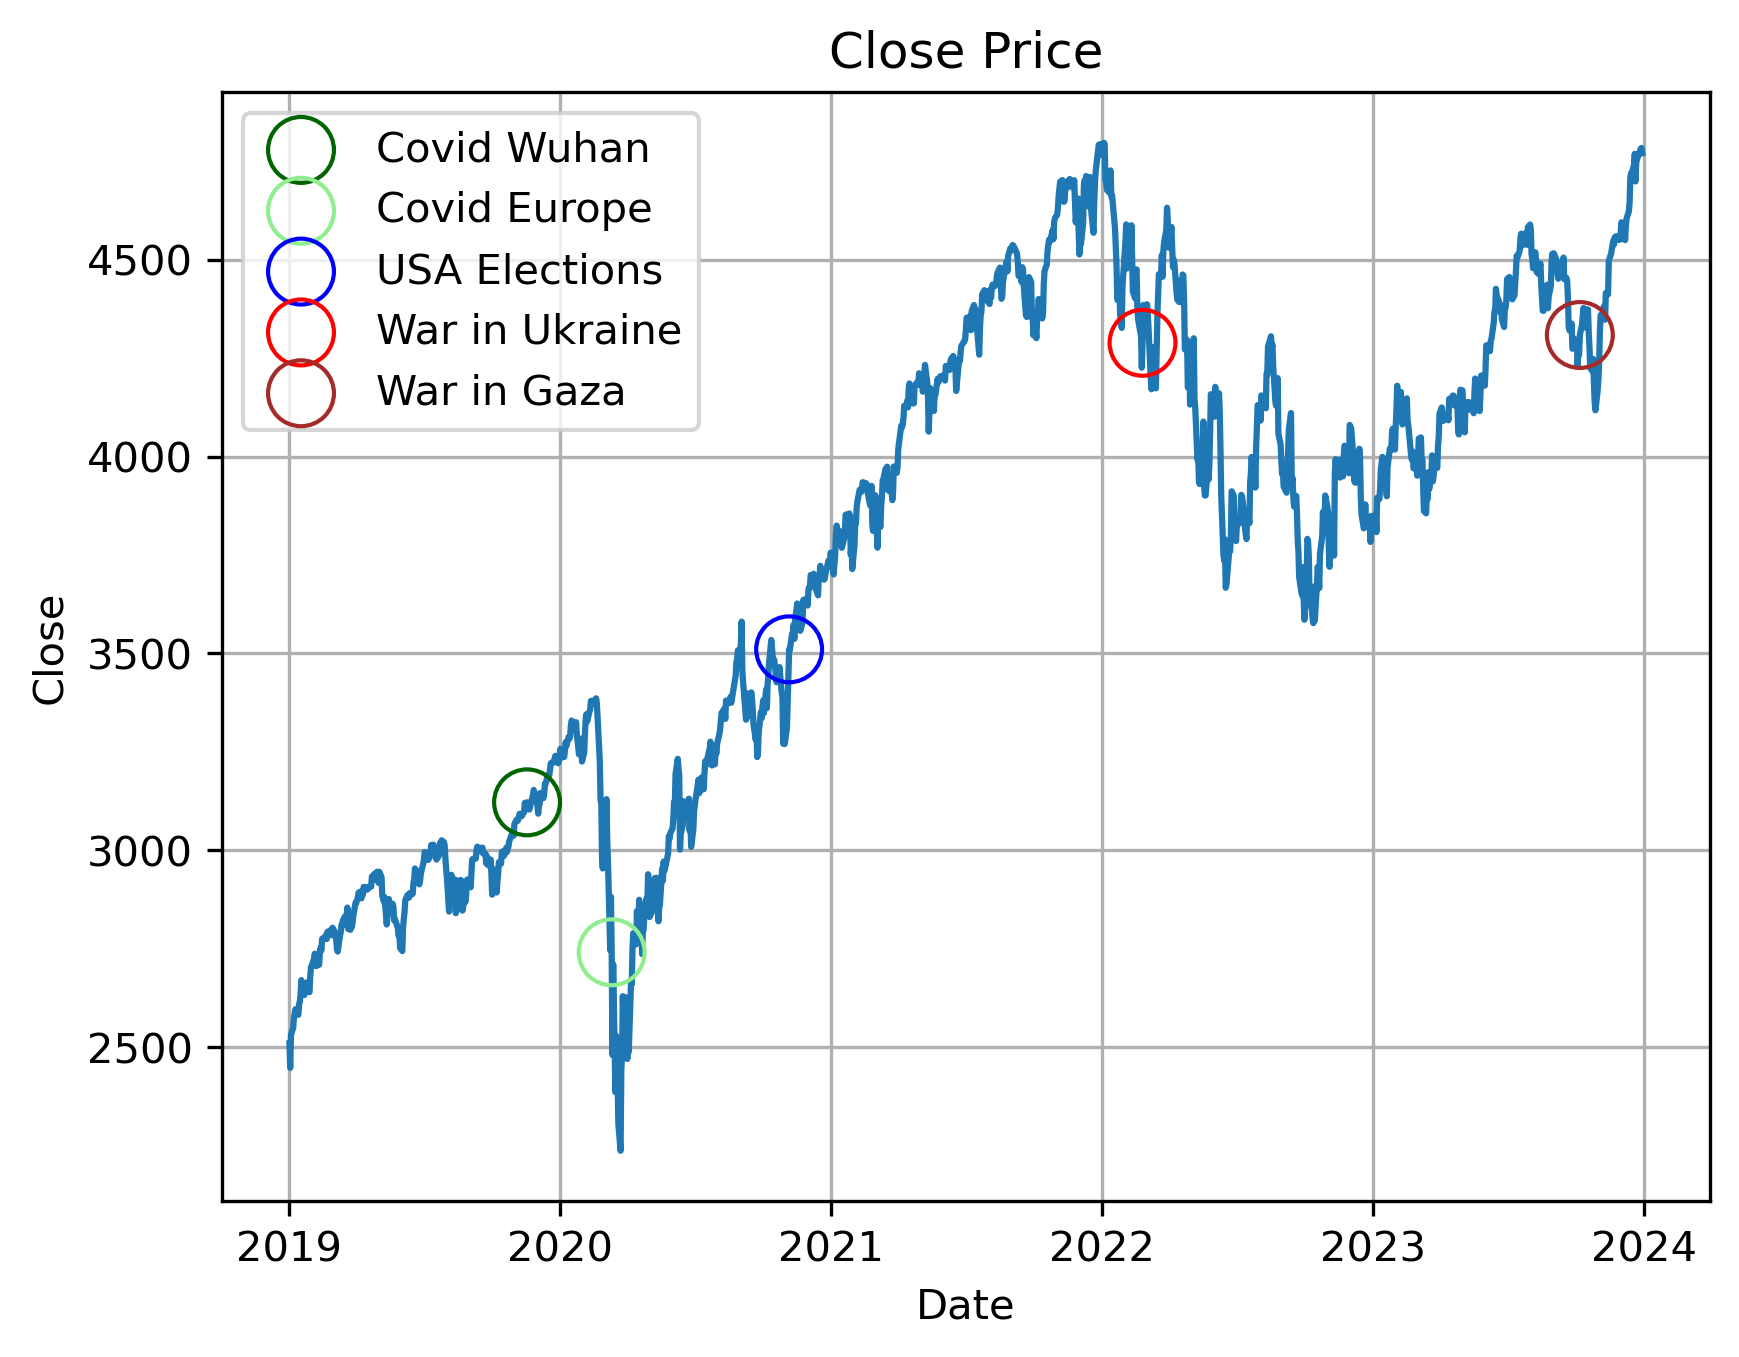

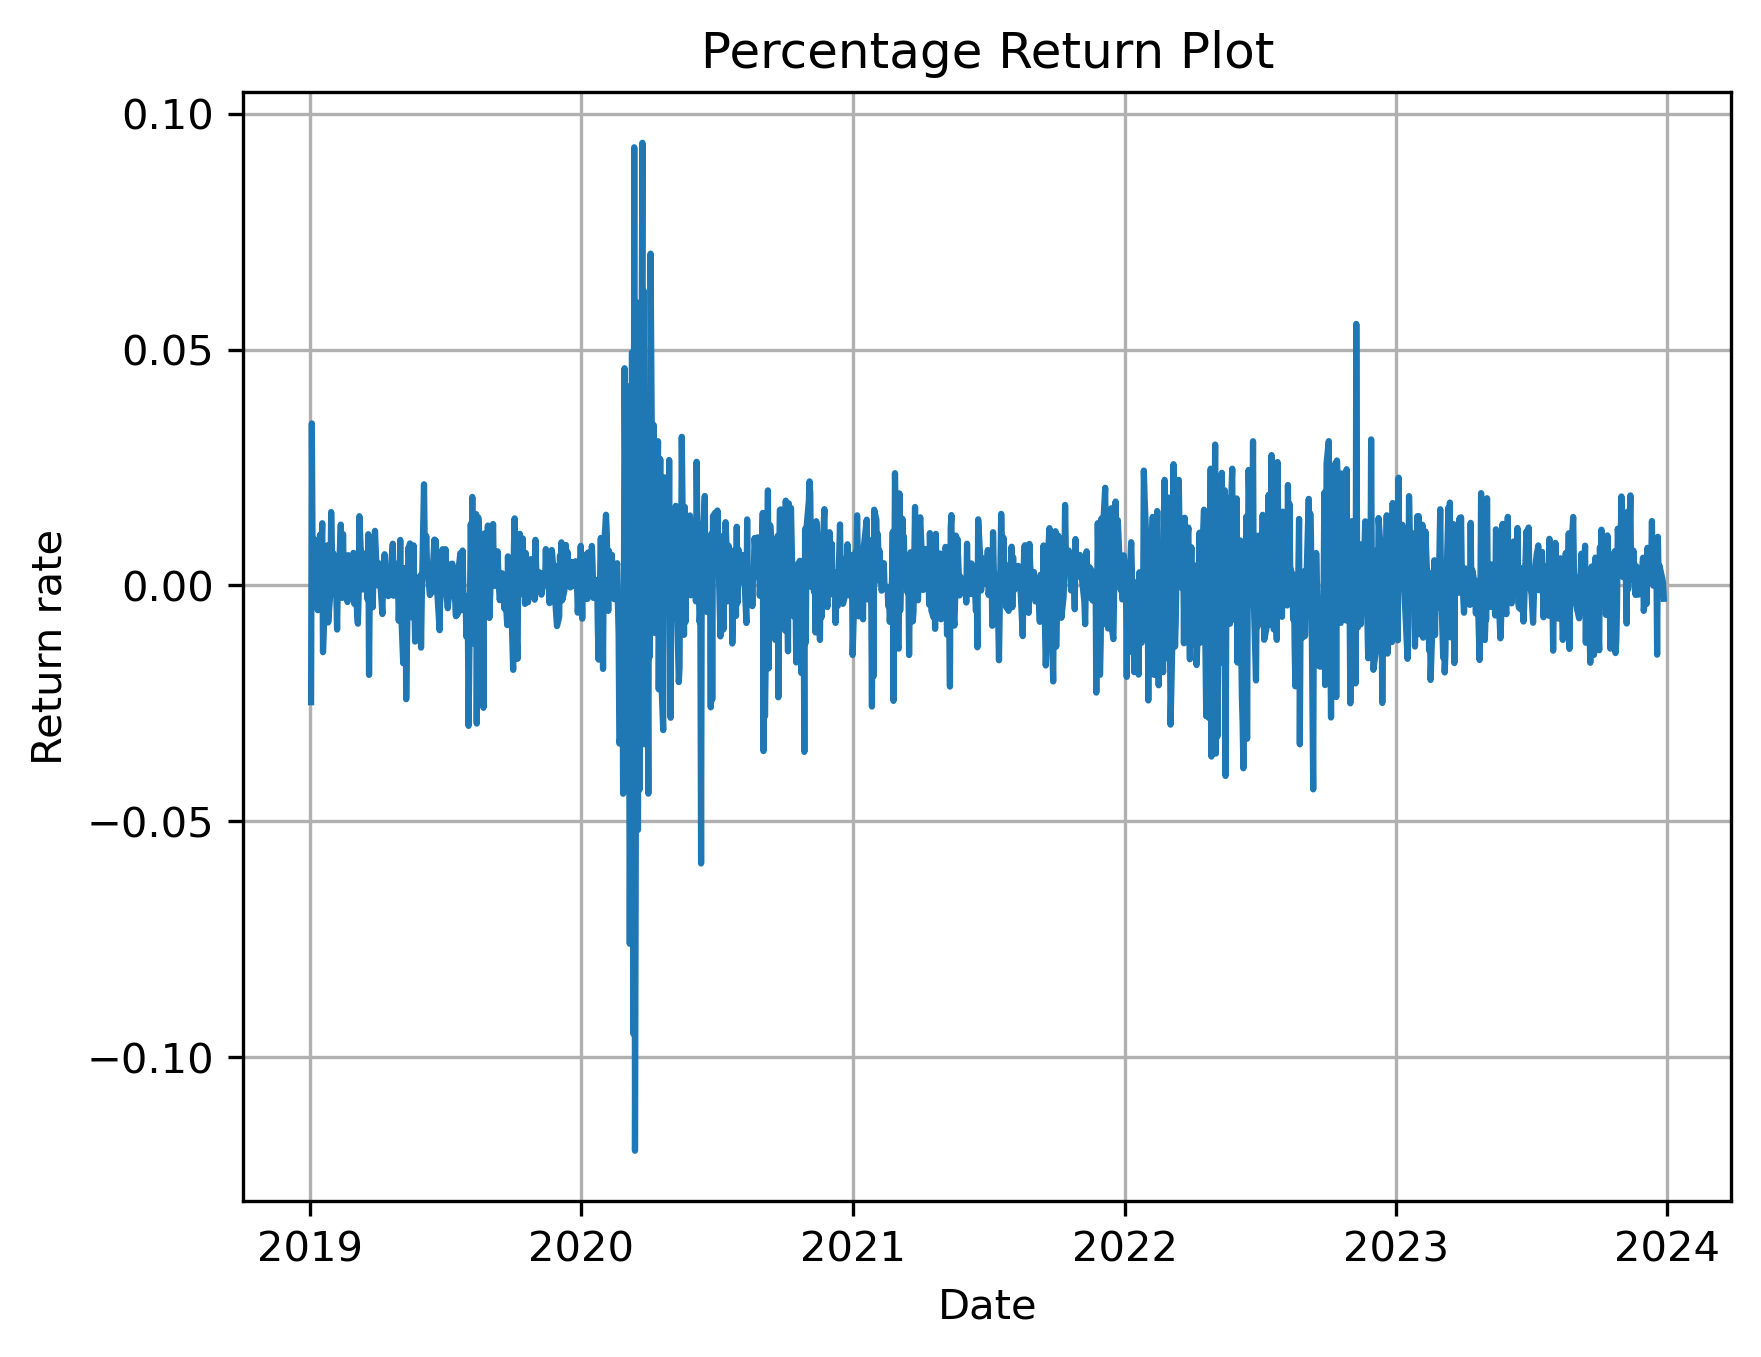

In [3]:
SP500.Plot()
SP500.ReturnPlot()


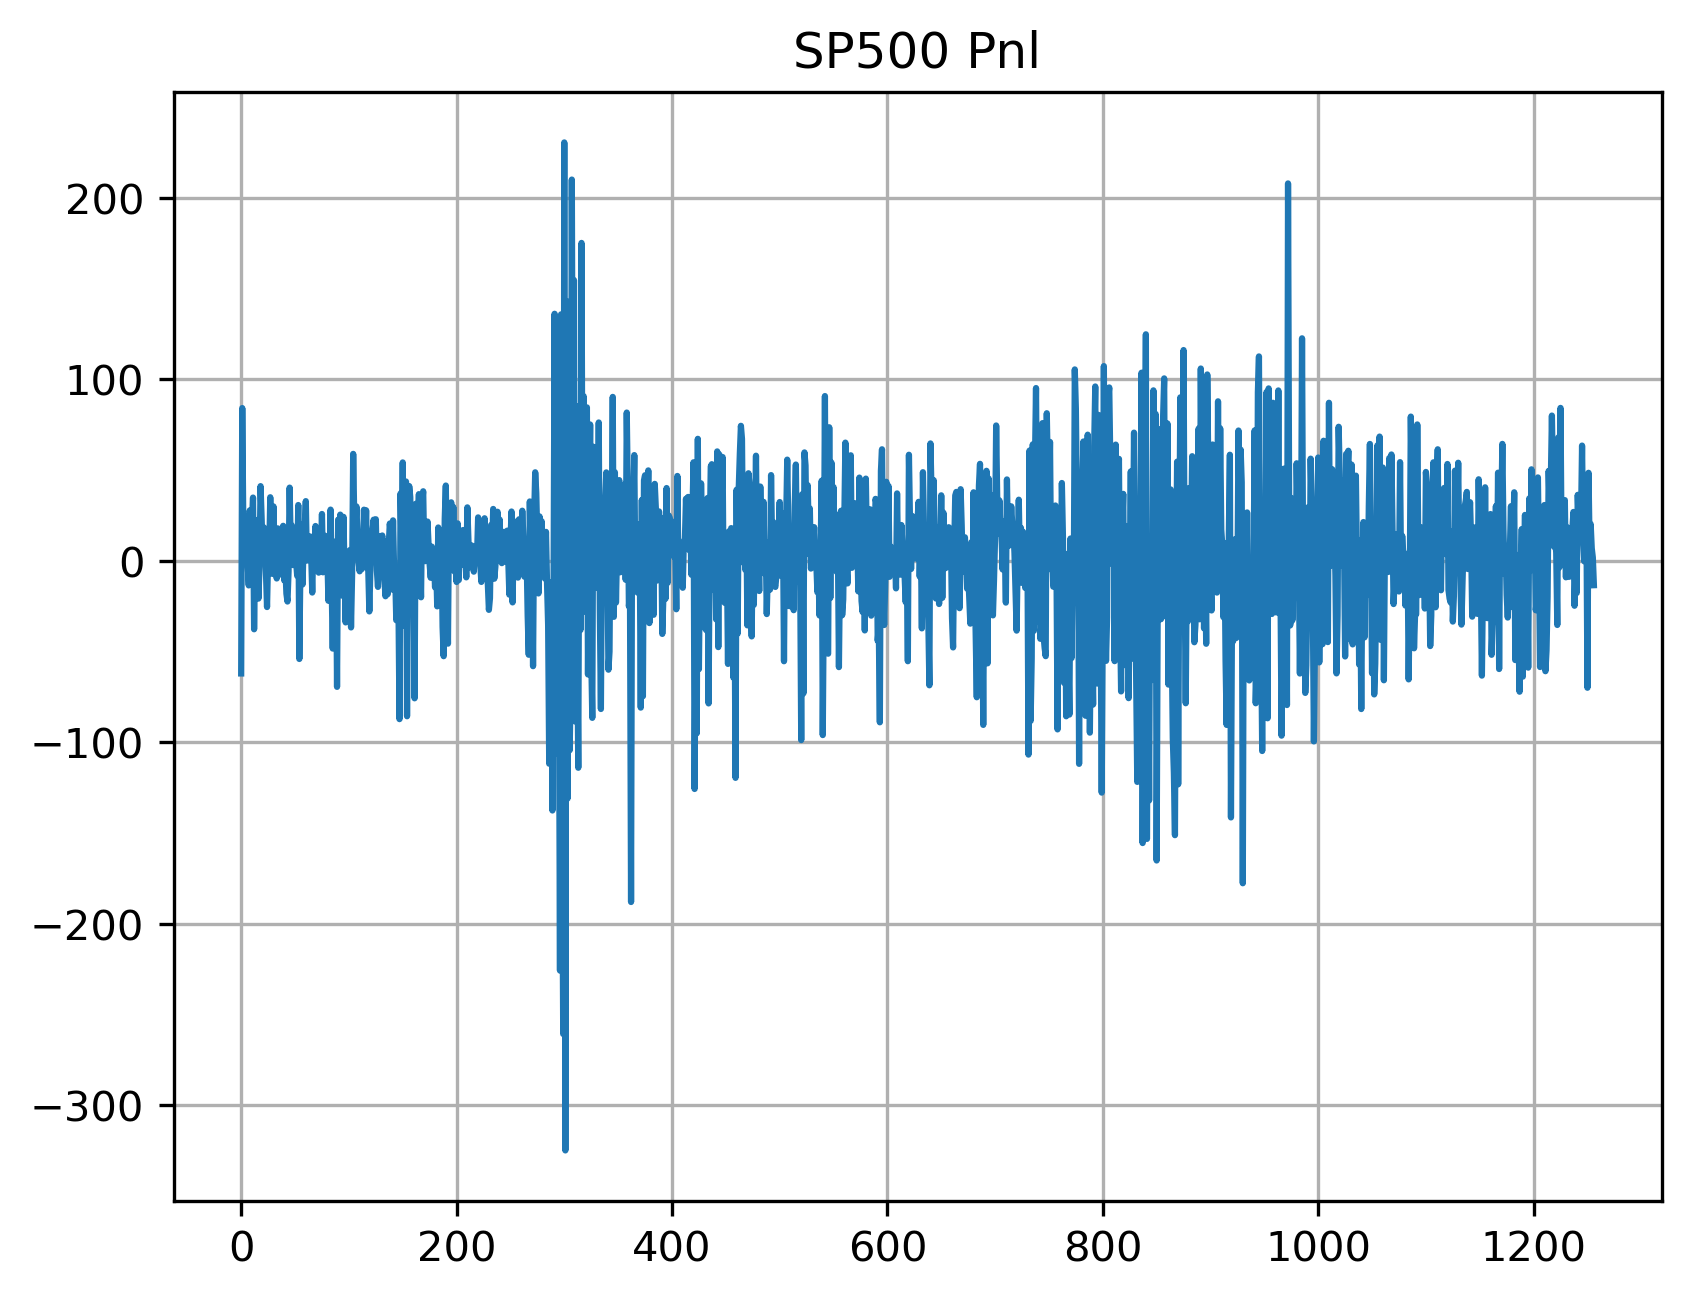

In [4]:
plt.figure(dpi = 300)
plt.plot(SP500.PnL())
plt.title('SP500 Pnl')
plt.grid()
plt.show()


In [5]:
## Plots and tests

SP500.ShapiroWilk(0.99)
print('\n')

SP500.LjungBox()
print('\n')

SP500.Levene()
print('\n')

SP500.Adf()


P-value of Shapiro-Wilk test is: 1.2742861874495749e-30
Null hypothesis of normality is rejected at the 0.99 level of significance


Ljung-Box test:
       lb_stat     lb_pvalue
35  349.113606  1.963768e-53


Levene test: W-statistic=34.82812088161804, p-value=1.3196921214813751e-27


ADF test: ADF statistic=-10.611749333382269, p-value=5.809969843581523e-19
Critical value (1%): -3.4356006420838963
Critical value (5%): -2.8638586845641063
Critical value (10%): -2.5680044958343604


## VaR estimation

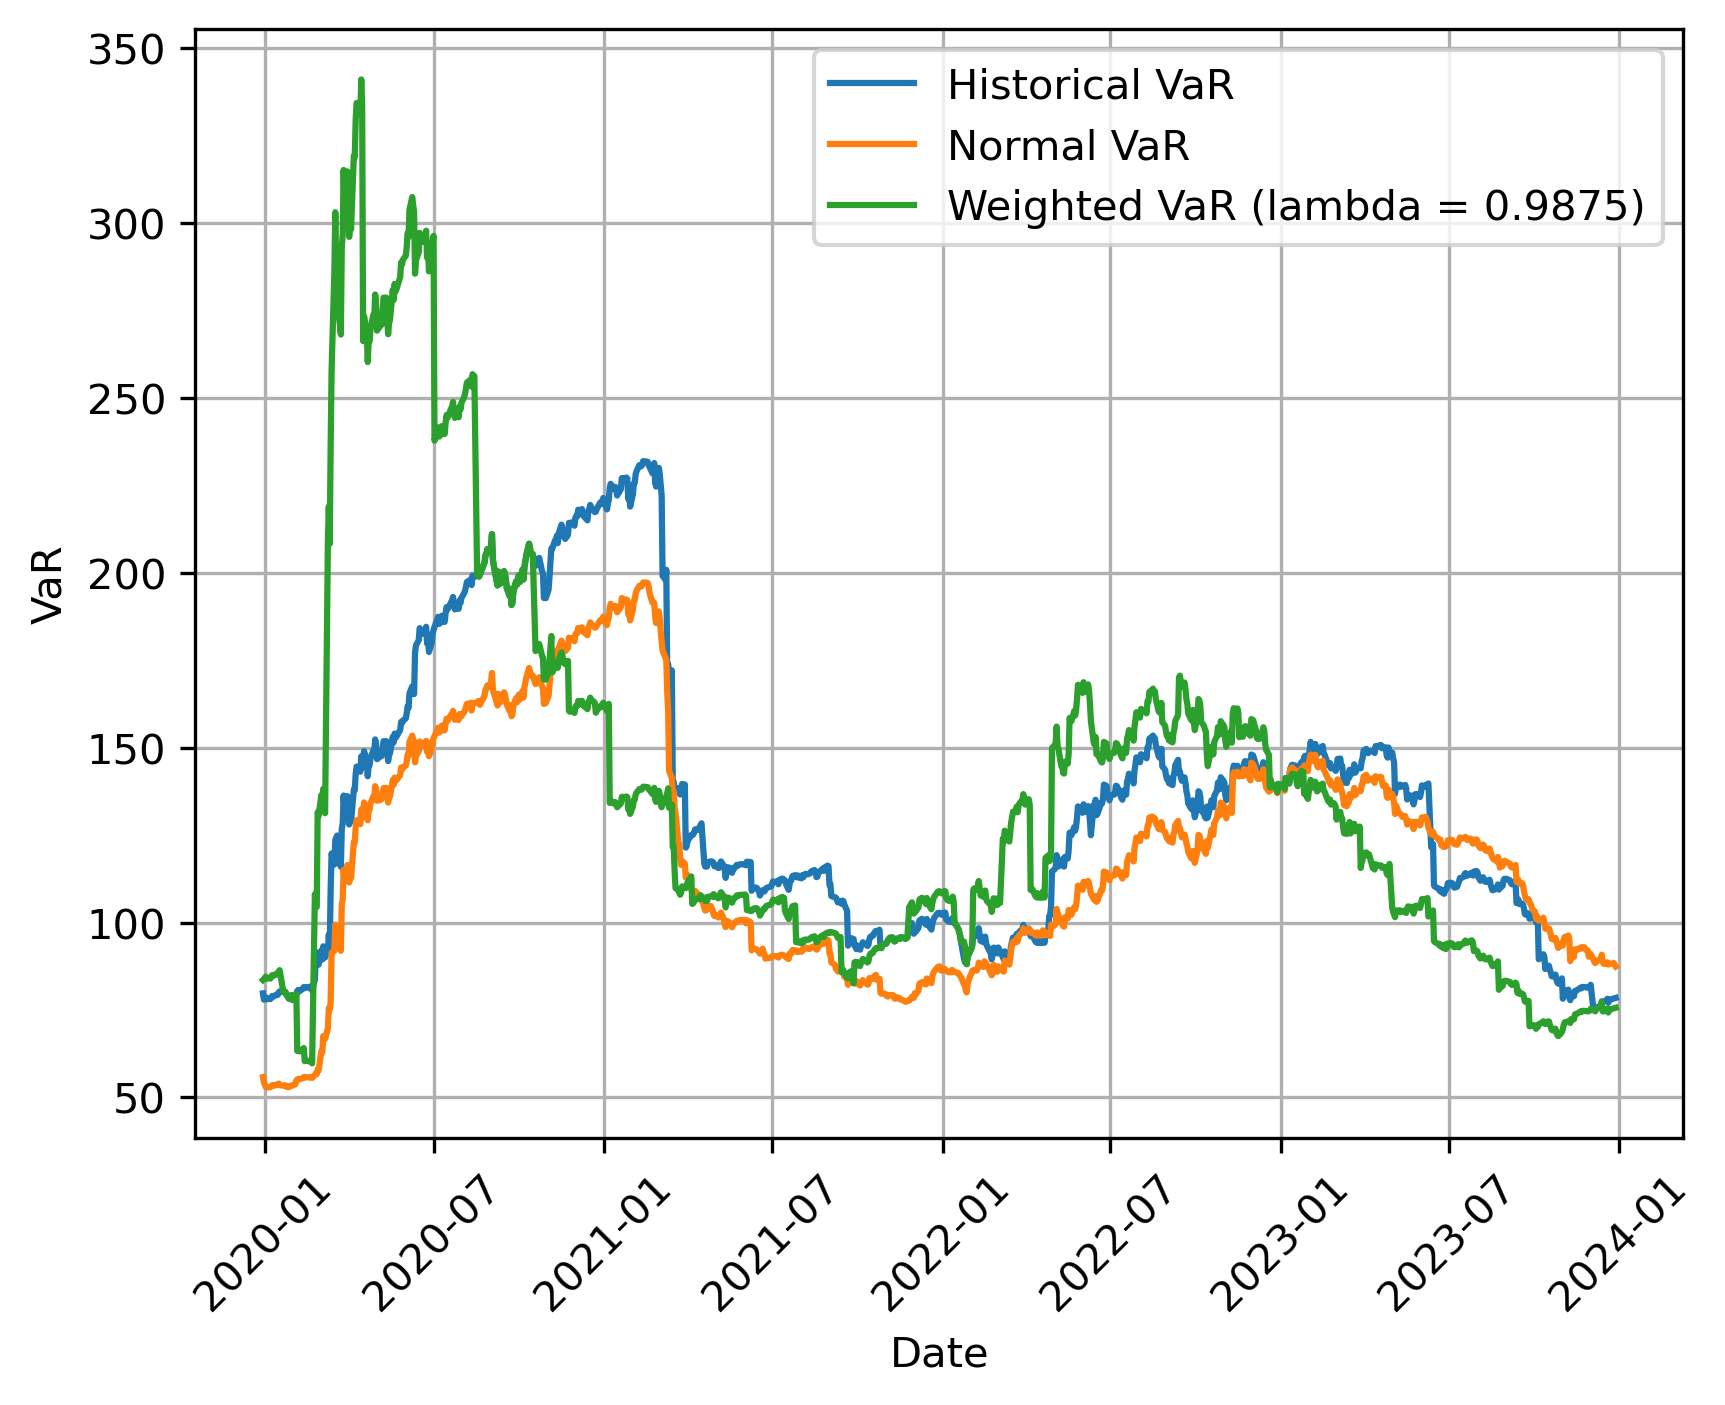

In [6]:
figure, axes = plt.subplots(dpi = 300)
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.plot(SP500.historicalData.index[250: -1], SP500.Historical_Var(), label = 'Historical VaR')
plt.plot(SP500.historicalData.index[250: -1], SP500.VarNorm(), label = 'Normal VaR')
# plt.plot(SP500.historicalData.index[250: -1], SP500.VarUnbNorm(), label = 'Unbiased Normal VaR')
plt.plot(SP500.historicalData.index[250: -1], SP500.VarWeighted(lam = 0.9875), label = 'Weighted VaR (lambda = 0.9875)')
plt.xlabel("Date")
plt.ylabel("VaR")
plt.grid()
plt.legend()
plt.show()


# Backtesting

`Backtest_daily` 和 `Backtest` 两个函数都是用于评估模型的风险价值 (Value at Risk, VaR) 的准确性，但它们在具体实现方式和评估的维度上有所不同。以下是两者的主要区别：

### 1. **评估维度**

- **Backtest**:
  - 这个函数只进行一次整体的评估。它使用一个固定的 250 天的回溯期来评估模型在整个测试期内的表现。
  - 函数返回一个异常天数的总数（`errors`），并根据这个总数将模型分为“绿区”、“黄区”或“红区”。
  - 这种方法提供了一个整体的风险评估结果，适合快速了解模型的总体表现。

- **Backtest_daily**:
  - 这个函数通过一个滑动窗口的方式逐日进行评估。它计算的是每个 250 天窗口内的异常比例，然后返回一个包含这些比例的数组。
  - 这种方法提供了一个更加细粒度的评估，使得用户可以观察 VaR 模型在不同时间段内的表现如何变化。

### 2. **返回结果**

- **Backtest**:
  - 返回的是异常天数的总数，并输出模型的整体评估结果（绿区、黄区、红区）。
  - 这是一个单一的评估结果，适合整体判断。

- **Backtest_daily**:
  - 返回的是一个数组，每个元素表示在某个 250 天窗口内的异常比例。
  - 这是一个更详细的结果，可以用于分析模型在不同时间段的风险表现，识别出潜在的时间趋势或异常。

### 3. **用途**

- **Backtest**:
  - 适合在一个固定的时间段内评估模型的整体准确性。如果用户只需要知道模型是否在整个测试期内表现良好，可以使用这个函数。

- **Backtest_daily**:
  - 适合更详细地分析模型的表现。用户可以通过观察每日的异常比例来了解模型在不同市场条件下的表现变化。例如，它可以帮助识别某些特定时期内模型表现不佳的原因。

### 4. **实现细节**

- **Backtest**:
  - 使用一个固定的 250 天窗口，单次计算异常天数，适合整体评估。

- **Backtest_daily**:
  - 使用一个滑动的 250 天窗口，每日计算异常比例，适合详细评估和分析。

### 总结

`Backtest` 提供了一个宏观的、一次性的评估结果，用于判断模型的总体风险表现。而 `Backtest_daily` 则提供了一个更加细致的评估，能够帮助用户分析模型在不同时间段内的表现差异。因此，选择使用哪个函数取决于你希望评估模型的方式和目标。

[*********************100%%**********************]  1 of 1 completed


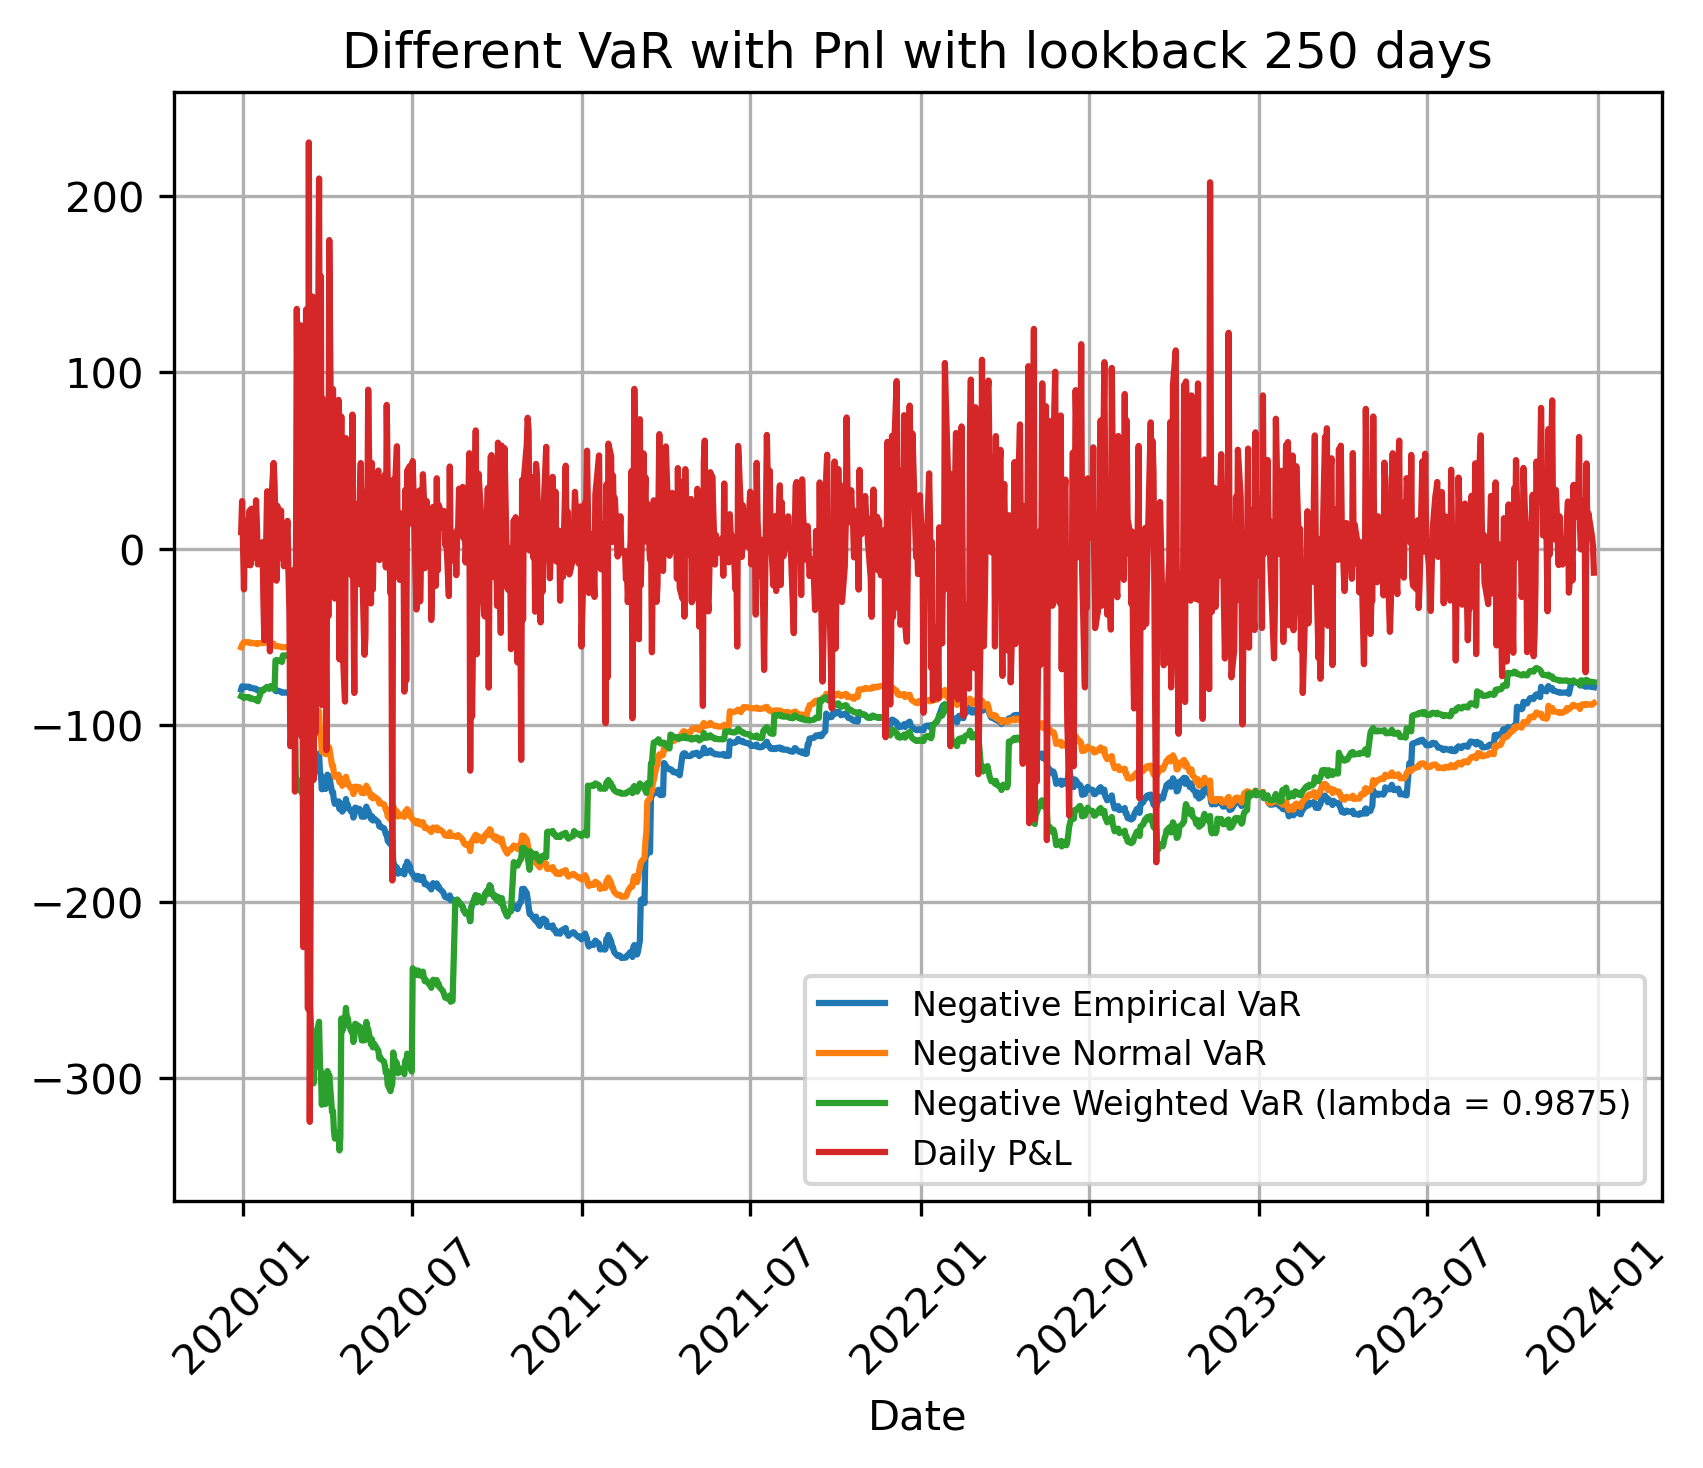

In [7]:

### lookback 250 days
SP500 = StockData("^GSPC", 2019, 1, 1, 2024, 1, 1)


lam = 0.9875

figure, axes = plt.subplots(dpi = 300)
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.plot(SP500.historicalData.index[250: -1], -SP500.Historical_Var(), label = 'Negative Empirical VaR')
plt.plot(SP500.historicalData.index[250: -1], -SP500.VarNorm(), label = 'Negative Normal VaR')
# plt.plot(SP500.historicalData.index[250: -1], -SP500.VarUnbNorm(), label = 'Negative Unbiased Normal VaR')
plt.plot(SP500.historicalData.index[250: -1], -SP500.VarWeighted(lam = lam), label = f'Negative Weighted VaR (lambda = {lam})')
# plt.plot(SP500.historicalData.index[250: -1], -SP500.MonteCarloVar(num_simulations=10000, time_horizon=1), label = f'Monte Carlo VaR ')

plt.plot(SP500.historicalData.index[250: -1], SP500.PnL()[250:], label = 'Daily P&L')
plt.xlabel("Date")
plt.title('Different VaR with Pnl with lookback 250 days')
plt.grid()
plt.legend(fontsize = "8")
plt.show()



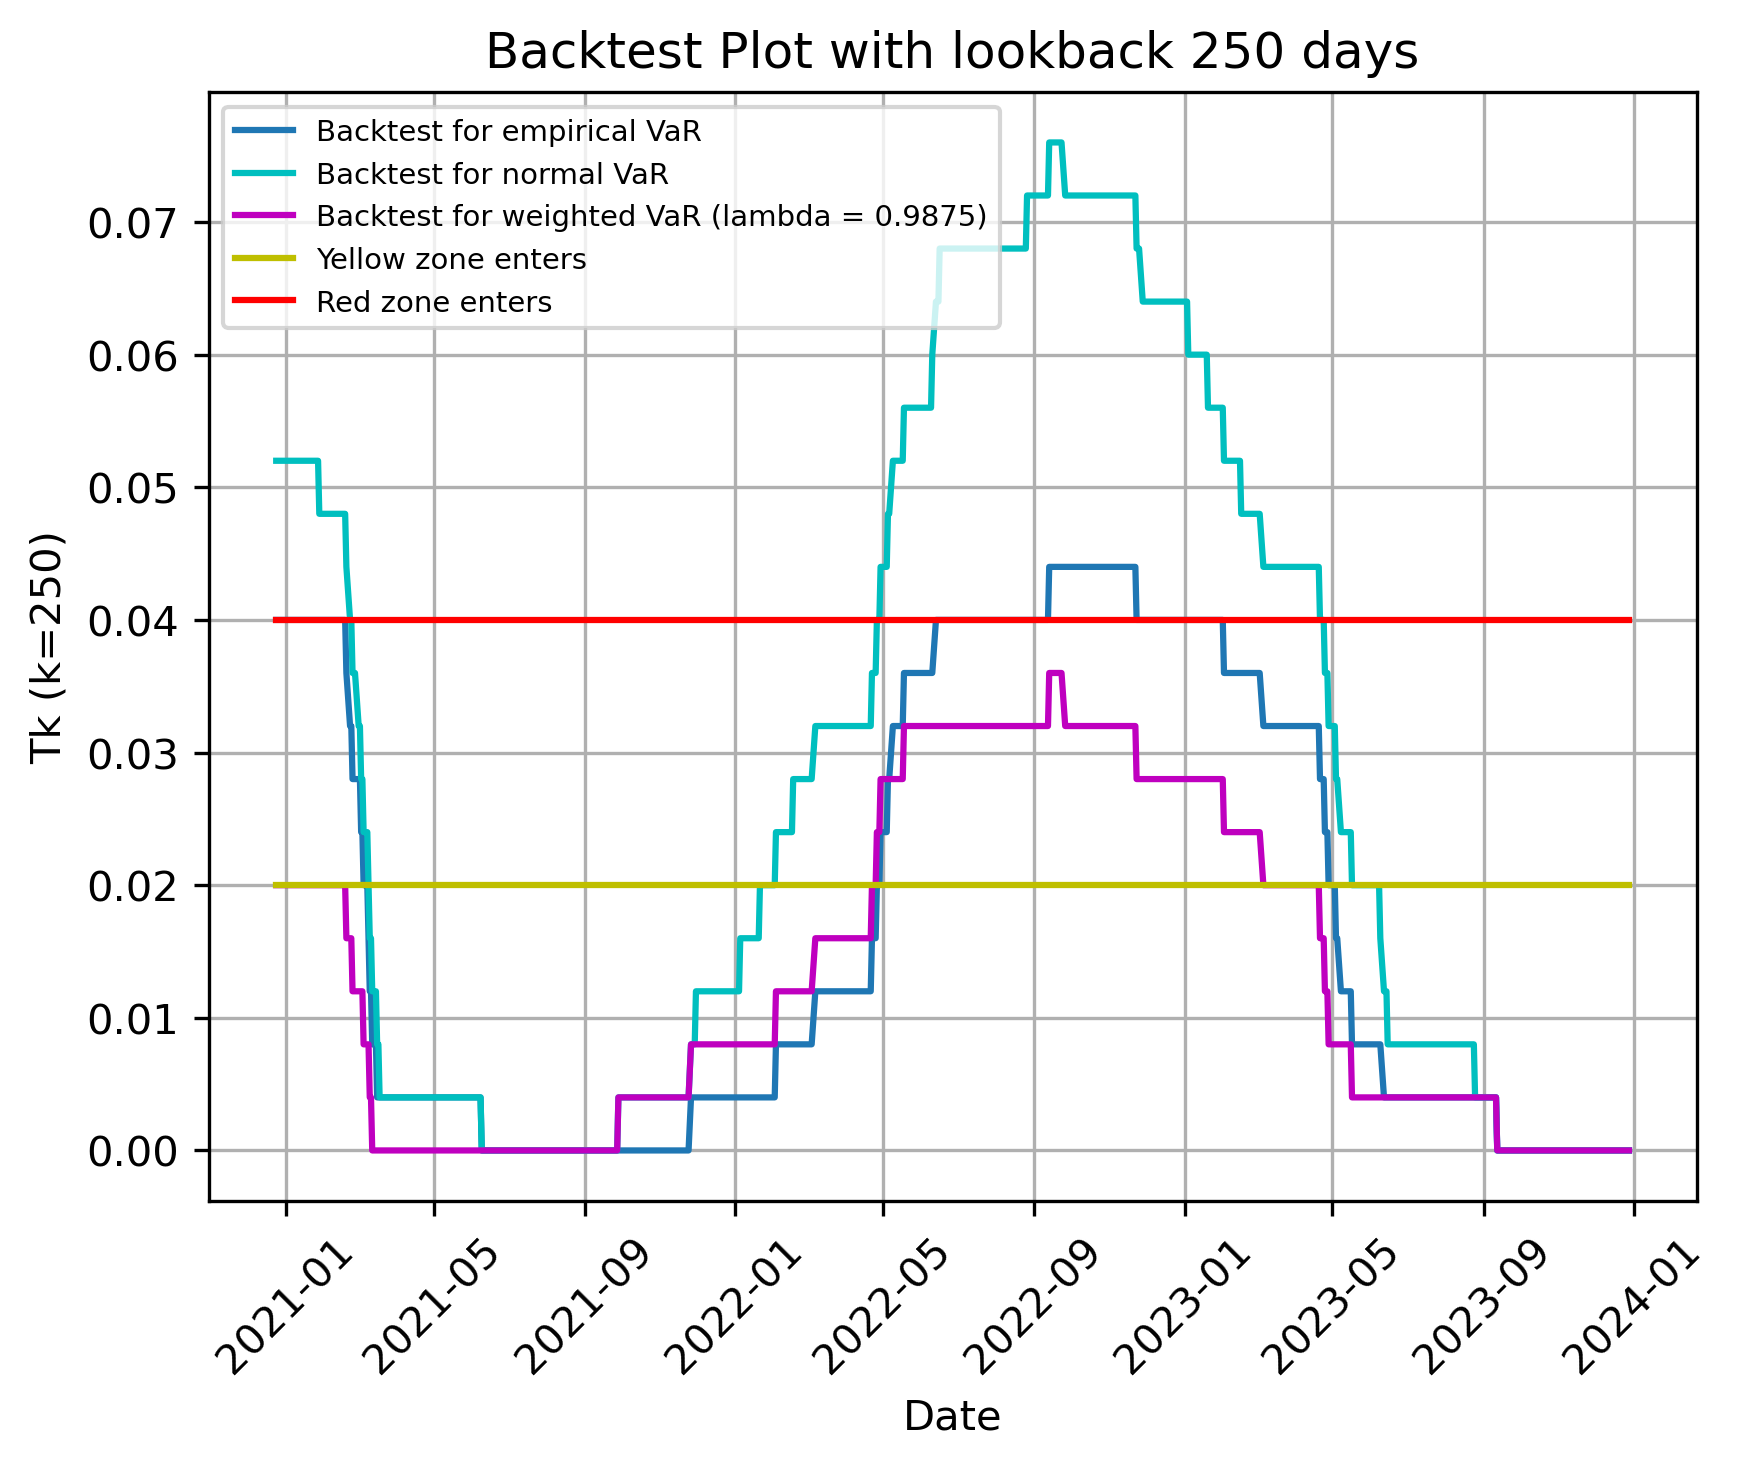

In [8]:
figure, axes = plt.subplots(dpi = 300)
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.plot(SP500.historicalData.index[500: -1], SP500.Backtest_daily(SP500.Historical_Var()), label = 'Backtest for empirical VaR')
plt.plot(SP500.historicalData.index[500: -1], SP500.Backtest_daily(SP500.VarNorm()), label = 'Backtest for normal VaR', c = "c")
# plt.plot(SP500.historicalData.index[500: -1], SP500.Backtest_daily(SP500.VarUnbNorm()), label = 'Backtest for unbiased normal VaR')
plt.plot(SP500.historicalData.index[500: -1], SP500.Backtest_daily(SP500.VarWeighted(lam = lam)), label = f'Backtest for weighted VaR (lambda = {lam})', c = "m")
plt.plot(SP500.historicalData.index[500: -1], np.full(len(SP500.Backtest_daily(SP500.Historical_Var())), 0.02), label = 'Yellow zone enters', c = "y")
plt.plot(SP500.historicalData.index[500: -1], np.full(len(SP500.Backtest_daily(SP500.Historical_Var())), 0.04), label = 'Red zone enters', c = "r")
plt.title('Backtest Plot with lookback 250 days')
plt.grid()
plt.xlabel("Date")
plt.ylabel("Tk (k=250)")
plt.legend(fontsize = "7")
plt.show()

# 如果回测的结果（如某个VaR模型的输出值）高于特定的风险区域线（例如黄色或红色的水平线），就意味着风险较大，可能处于危险状态




In [9]:
"""We can perform backtesting for all 1007 calculated VaRs. Then the green zone"""

print('historical Var')
SP500.Backtest(SP500.Historical_Var())
print('\n')

print('normal distribution Var')
SP500.Backtest(SP500.VarNorm())
print('\n')


# print('unbaised Var')
# SP500.Backtest(SP500.VarUnbNorm())
# print('\n')


print('weighted Var')
SP500.Backtest(SP500.VarWeighted(lam))
print('\n')


historical Var
Number of exceptions = 21
Yellow zone, watch out!


normal distribution Var
Number of exceptions = 32
Red zone, stay away!


weighted Var
Number of exceptions = 14
Yellow zone, watch out!




[*********************100%%**********************]  1 of 1 completed


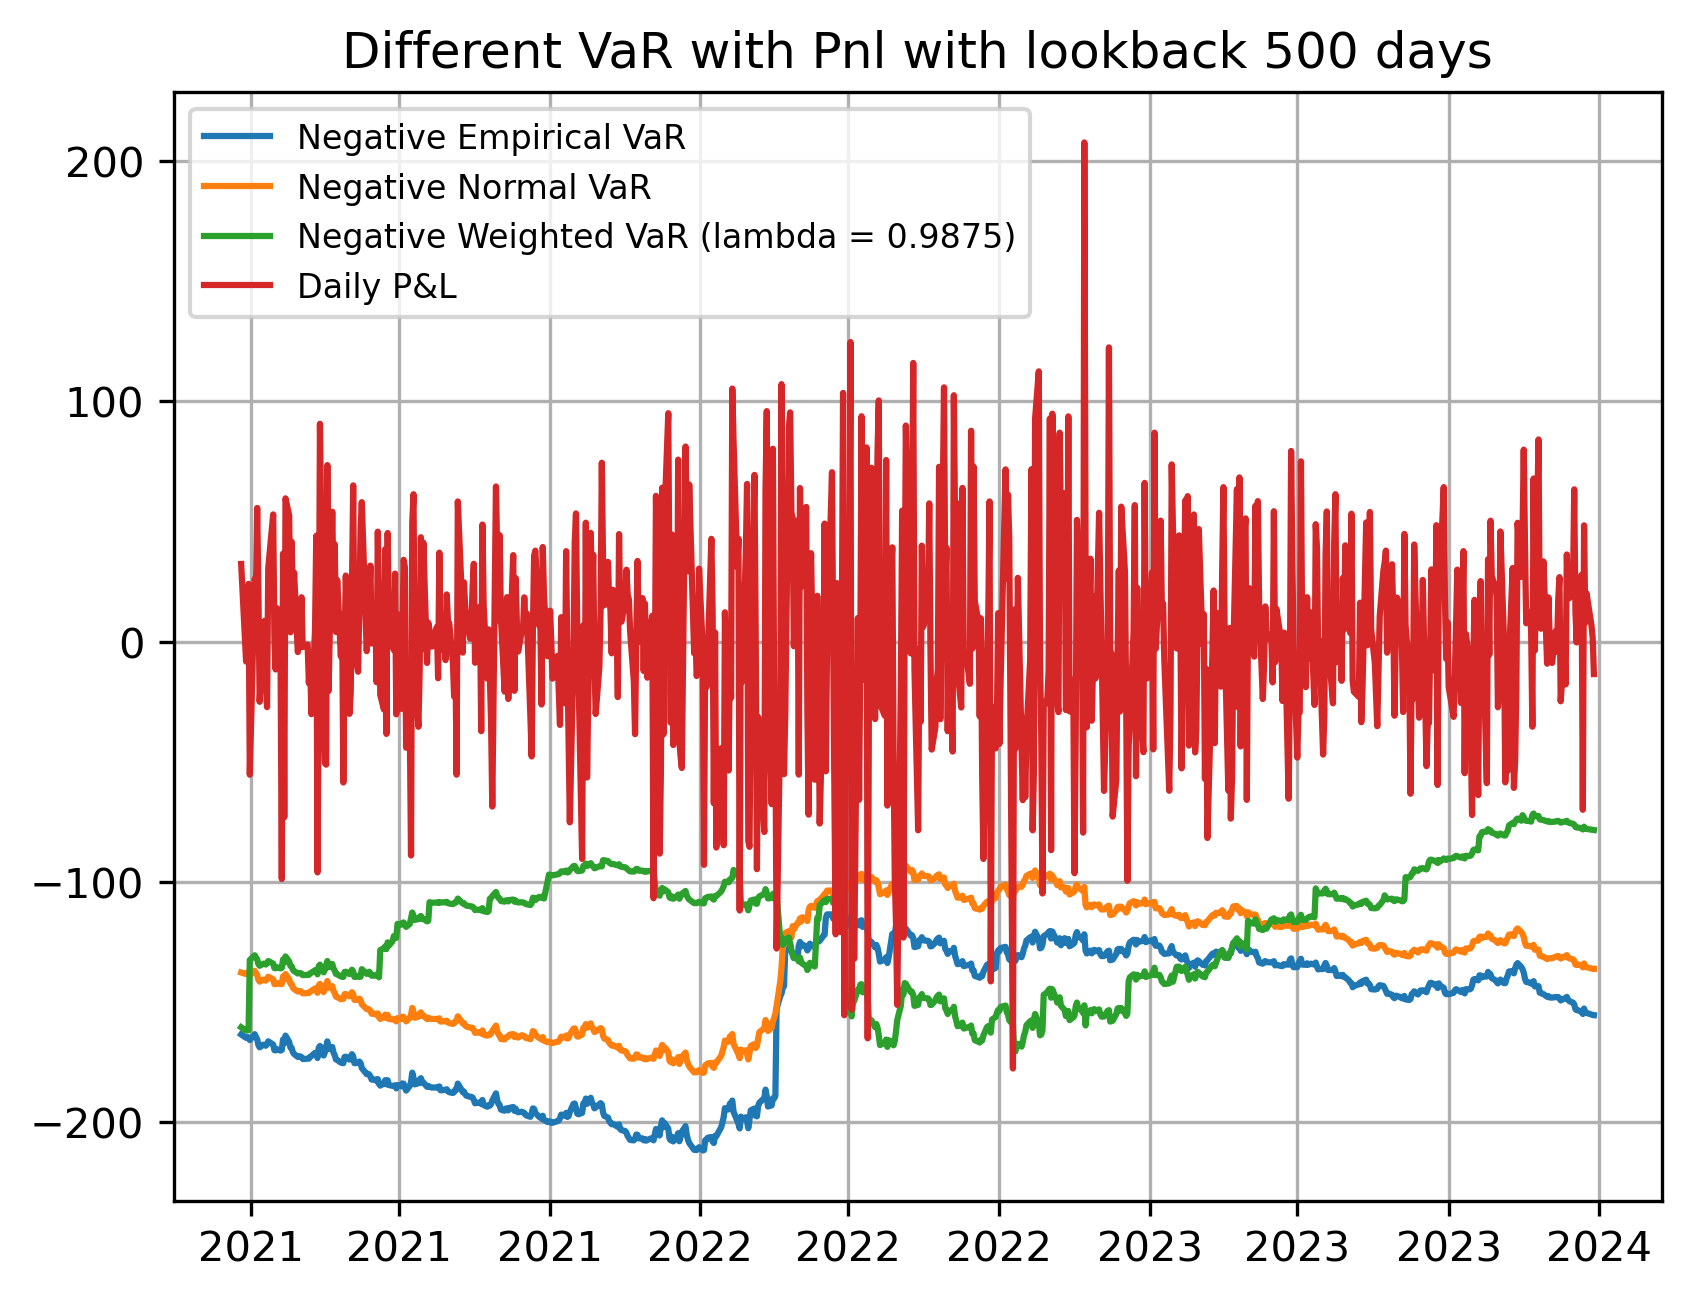

In [10]:
### lookback 500 days

SP5002 = StockData("^GSPC", 2019, 1, 1, 2024, 1, 1, lookback = 500)

lam = 0.9875
figure, axes = plt.subplots(dpi = 300)
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.plot(SP5002.historicalData.index[500: -1], -SP5002.Historical_Var(), label = 'Negative Empirical VaR')
plt.plot(SP5002.historicalData.index[500: -1], -SP5002.VarNorm(), label = 'Negative Normal VaR')
# plt.plot(SP5002.historicalData.index[500: -1], -SP5002.VarUnbNorm(), label = 'Negative Unbiased Normal VaR')
plt.plot(SP5002.historicalData.index[500: -1], -SP5002.VarWeighted(lam), label = f'Negative Weighted VaR (lambda = {lam})')
# plt.plot(SP500.historicalData.index[500: -1], -SP5002.MonteCarloVar(num_simulations=10000, time_horizon=1), label = f'Monte Carlo VaR ')

plt.plot(SP5002.historicalData.index[500: -1], SP5002.PnL()[500:], label = 'Daily P&L')
plt.title('Different VaR with Pnl with lookback 500 days')
plt.grid()
plt.legend(fontsize = "8")
plt.show()


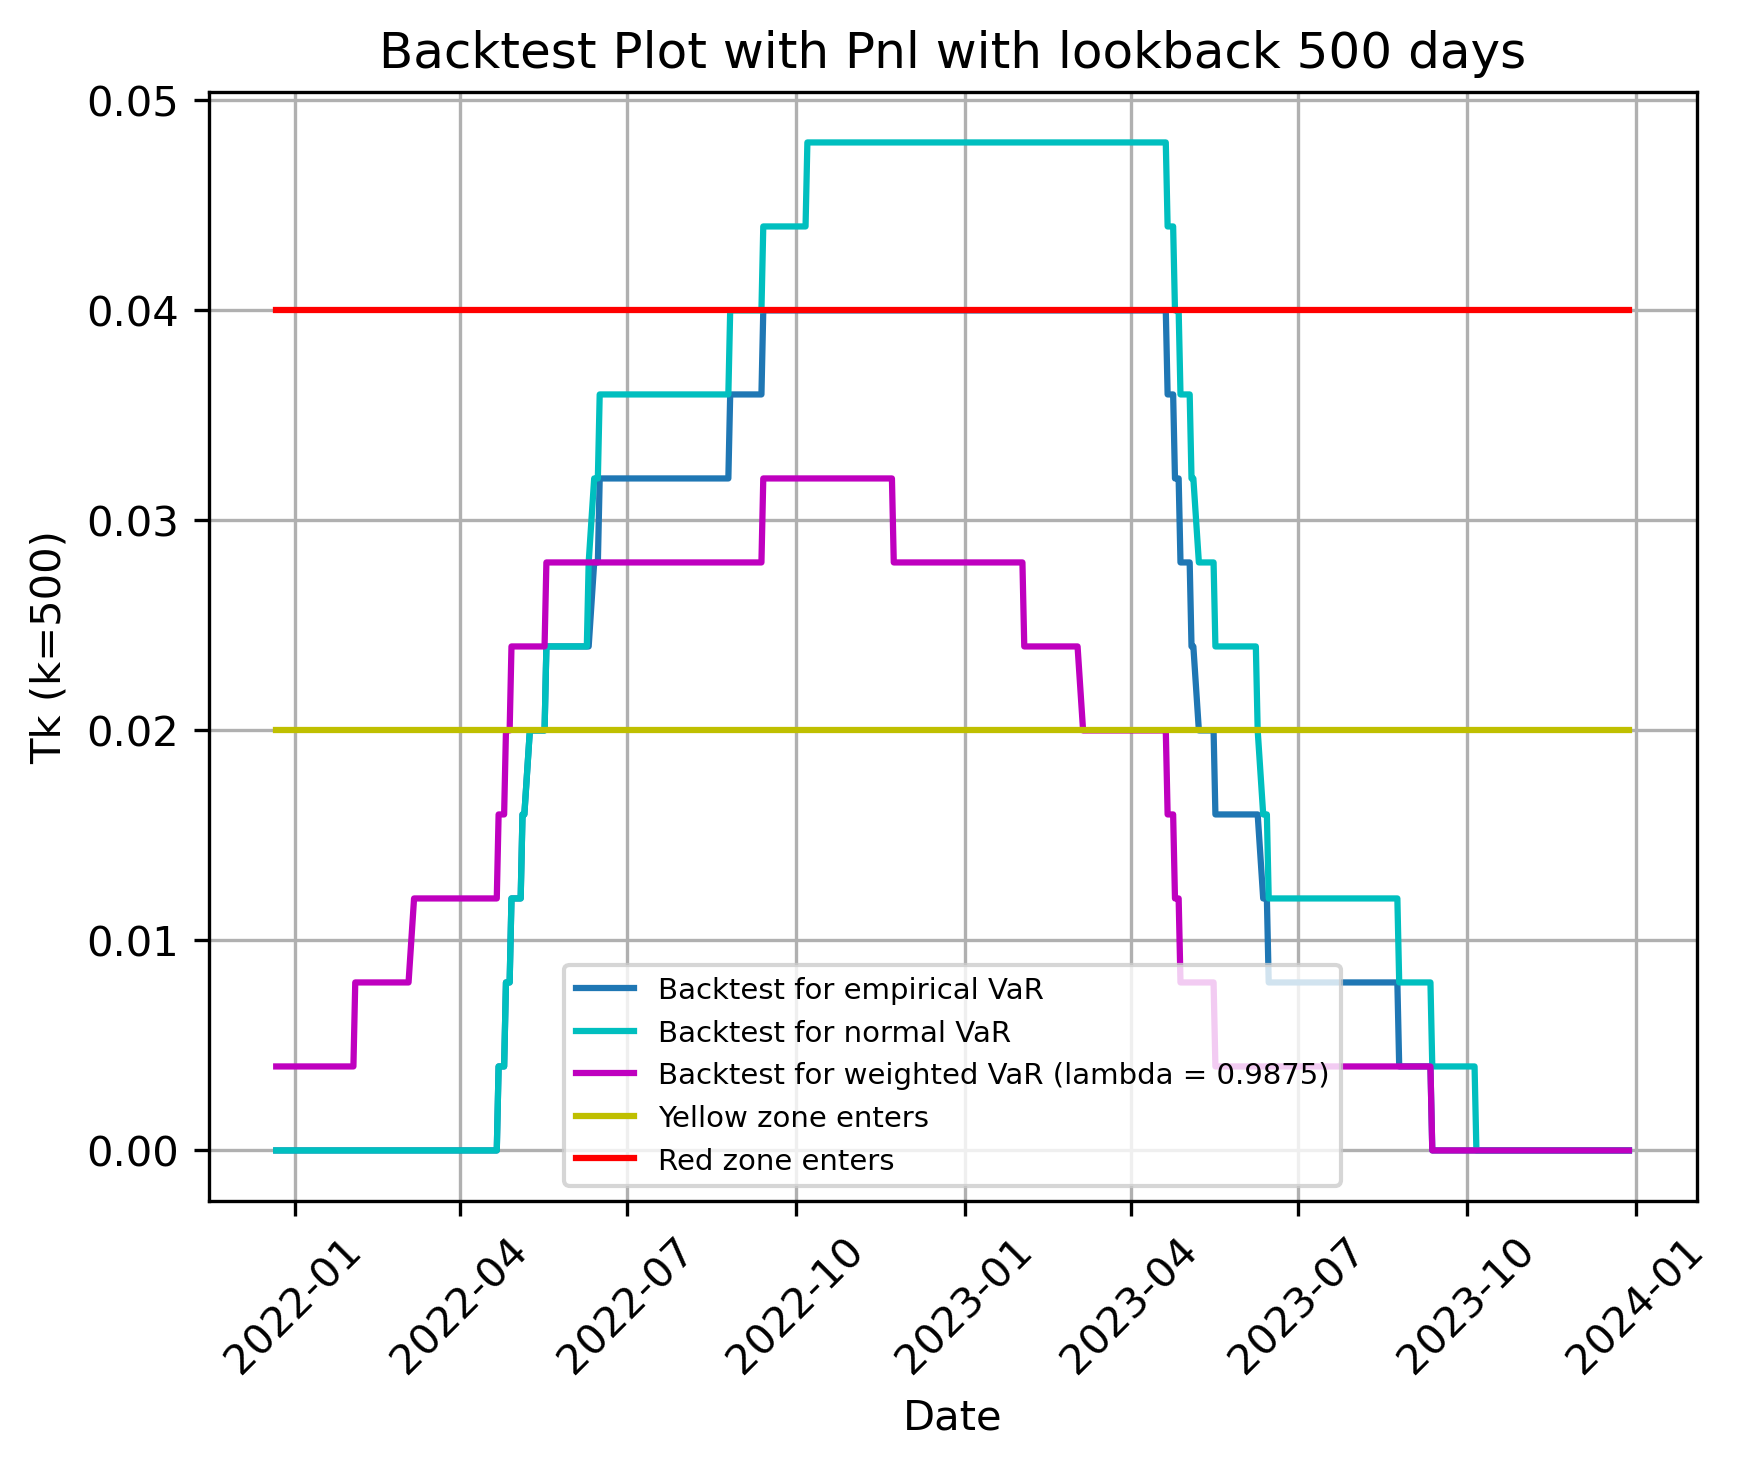

In [11]:
lam = 0.9875

figure, axes = plt.subplots(dpi = 300)
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.plot(SP5002.historicalData.index[750: -1], SP5002.Backtest_daily(SP5002.Historical_Var()), label = 'Backtest for empirical VaR')
plt.plot(SP5002.historicalData.index[750: -1], SP5002.Backtest_daily(SP5002.VarNorm()), label = 'Backtest for normal VaR', c = "c")
# plt.plot(SP5002.historicalData.index[750: -1], SP5002.Backtest_daily(SP5002.VarUnbNorm()), label = 'Backtest for unbiased normal VaR')
plt.plot(SP5002.historicalData.index[750: -1], SP5002.Backtest_daily(SP5002.VarWeighted(lam = lam)), label = f'Backtest for weighted VaR (lambda = {lam})', c = "m")
plt.plot(SP5002.historicalData.index[750: -1], np.full(len(SP5002.Backtest_daily(SP5002.Historical_Var())), 0.02), label = 'Yellow zone enters', c = "y")
plt.plot(SP5002.historicalData.index[750: -1], np.full(len(SP5002.Backtest_daily(SP5002.Historical_Var())), 0.04), label = 'Red zone enters', c = "r")
plt.grid()
plt.title('Backtest Plot with Pnl with lookback 500 days')
plt.xlabel("Date")
plt.ylabel("Tk (k=500)")
plt.legend(fontsize = "7")
plt.show()




In [12]:

print('historical Var')
SP5002.Backtest2(SP5002.Historical_Var())
print('\n')

print('normal distribution Var')
SP5002.Backtest2(SP5002.VarNorm())
print('\n')


# print('unbaised Var')
# SP5002.Backtest2(SP5002.VarUnbNorm())
# print('\n')


print('weighted Var')
SP5002.Backtest2(SP5002.VarWeighted(lam))
print('\n')


historical Var
Number of exceptions = 10
Green zone, model looks to be correct


normal distribution Var
Number of exceptions = 12
Yellow zone, watch out!


weighted Var
Number of exceptions = 8
Green zone, model looks to be correct


